# Importing required libraries

In [1]:
import sqlite3

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Creating SQLite Database And Table

In [3]:
conn = sqlite3.connect("sales_data.db")

cursor = conn.cursor()


In [4]:
cursor.execute("DROP TABLE IF EXISTS sales")

In [5]:
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Laptop", 3, 1000.0),
    ("Laptop", 2, 950.0),
    ("Phone", 5, 500.0),
    ("Phone", 8, 450.0),
    ("Tablet", 4, 300.0),
    ("Tablet", 6, 280.0),
    ("Headphones", 10, 50.0),
    ("Headphones", 15, 45.0),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Now Performing some basic SQL Query

In [6]:
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

      product  total_qty  revenue
0  Headphones         25   1175.0
1      Laptop          5   4900.0
2       Phone         13   6100.0
3      Tablet         10   2880.0


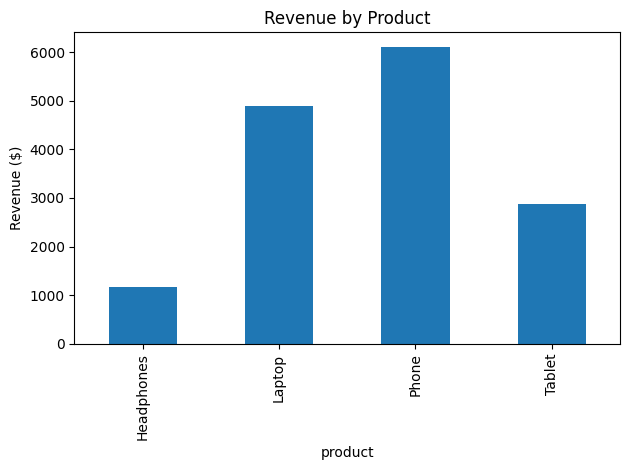

In [7]:
df.plot(kind='bar', x='product', y='revenue', legend=False, title="Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show() 

In [8]:
query = """
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 1
"""
df = pd.read_sql_query(query, conn)
print(df)


      product  total_qty
0  Headphones         25


In [9]:
query = """
SELECT product, ROUND(AVG(price), 2) AS avg_price
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

      product  avg_price
0  Headphones       47.5
1      Laptop      975.0
2       Phone      475.0
3      Tablet      290.0


In [10]:
query = """
WITH revenue_cte AS (
    SELECT product, SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
)
SELECT product, revenue,
       ROUND(revenue * 100.0 / (SELECT SUM(revenue) FROM revenue_cte), 2) AS pct_of_total
FROM revenue_cte
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)
print(df)

      product  revenue  pct_of_total
0       Phone   6100.0         40.52
1      Laptop   4900.0         32.55
2      Tablet   2880.0         19.13
3  Headphones   1175.0          7.80


In [11]:
query = """
SELECT id, product, quantity, price, (quantity * price) AS sale_value
FROM sales
ORDER BY sale_value DESC
LIMIT 1
"""
df = pd.read_sql_query(query, conn)
print(df)

   id product  quantity  price  sale_value
0   4   Phone         8  450.0      3600.0


In [12]:
query = """
SELECT product, ROUND(AVG(price), 2) AS avg_price
FROM sales
GROUP BY product
HAVING avg_price > 300
"""
df = pd.read_sql_query(query, conn)
print(df)

  product  avg_price
0  Laptop      975.0
1   Phone      475.0


In [13]:
query = "SELECT SUM(quantity) AS total_units FROM sales"
df = pd.read_sql_query(query, conn)
print(df)

   total_units
0           53


In [14]:
query = """
SELECT product, SUM(quantity * price) AS revenue,
       ROW_NUMBER() OVER (ORDER BY SUM(quantity * price) DESC) AS rank
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

      product  revenue  rank
0       Phone   6100.0     1
1      Laptop   4900.0     2
2      Tablet   2880.0     3
3  Headphones   1175.0     4


In [1]:
df.plot(kind='pie', y='revenue', labels=df['product'], autopct='%1.1f%%', legend=False)
plt.ylabel("")
plt.title("Revenue Share by Product")
plt.savefig("revenue_share_chart.png")  
plt.show()

NameError: name 'df' is not defined

In [2]:
df_sorted = df.sort_values("revenue")
df_sorted.plot(kind='line', x='product', y='revenue', marker='o')
plt.title("Revenue Trend")
plt.ylabel("Revenue ($)")
plt.savefig("revenue-trend_chart.png")  
plt.show()

NameError: name 'df' is not defined

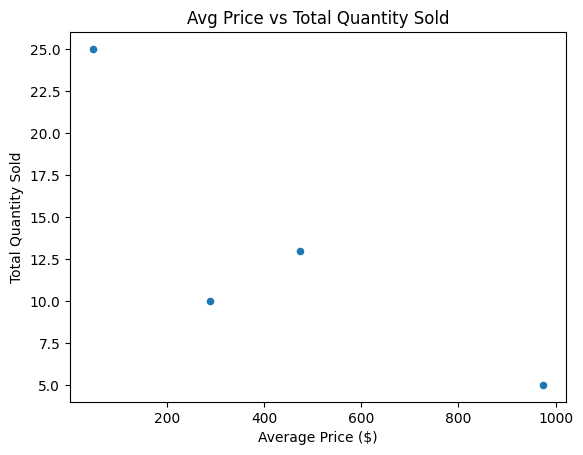

In [17]:
query = """
SELECT product, AVG(price) AS avg_price, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
"""
df2 = pd.read_sql_query(query, conn)

df2.plot(kind='scatter', x='avg_price', y='total_qty')
plt.title("Avg Price vs Total Quantity Sold")
plt.xlabel("Average Price ($)")
plt.ylabel("Total Quantity Sold")
plt.savefig("price_vs_Quantity_chart.png")  
plt.show()

# Closing Connection

In [18]:
conn.close()